In [431]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


In [432]:
attributes = ['Age', 'Sector', 'idk', 'Education', 'idk2', 'Marital_Stat', 'Job', 'Family', 'Race', 'Gender', 'idk3', 'idk4', 'Hours/wk', 'Country', 'Income_>50k']

df = pd.read_csv(r"./adult.csv", header=None)
df.columns = attributes
df.head()

,Age,Sector,idk,Education,idk2,Marital_Stat,Job,Family,Race,Gender,idk3,idk4,Hours/wk,Country,Income_>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


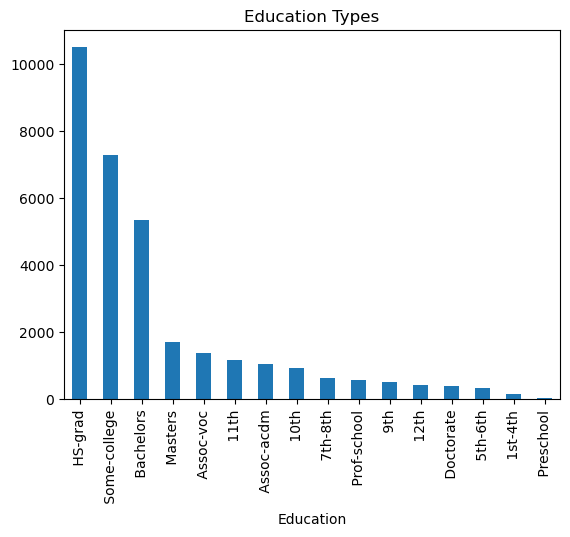

In [433]:
plt.figure()
df['Education'].value_counts().plot(kind='bar')
plt.title('Education Types')
plt.show()

c:\Users\vboy7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


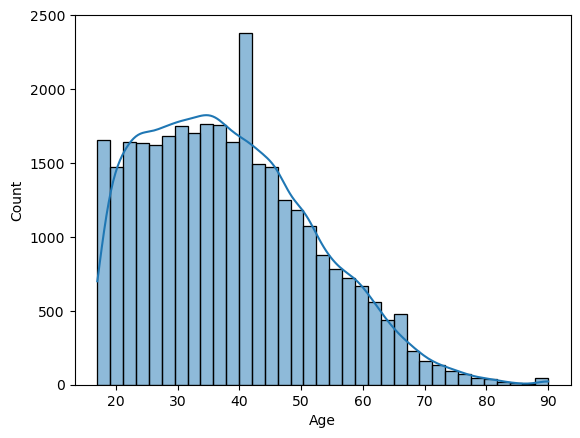

In [434]:
sns.histplot(data=df, x='Age', bins=35, kde=True)
plt.show()

c:\Users\vboy7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


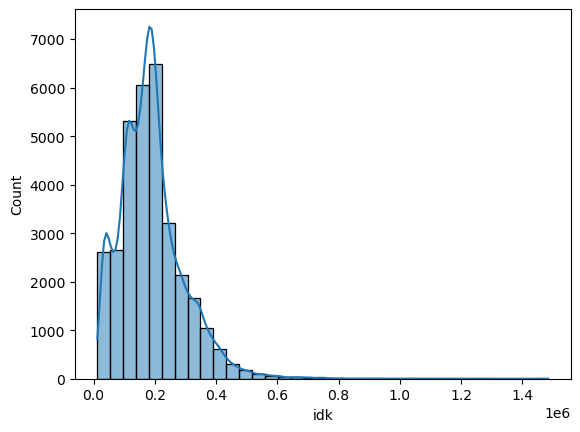

In [435]:
sns.histplot(data=df, x='idk', bins=35, kde=True)
plt.show()

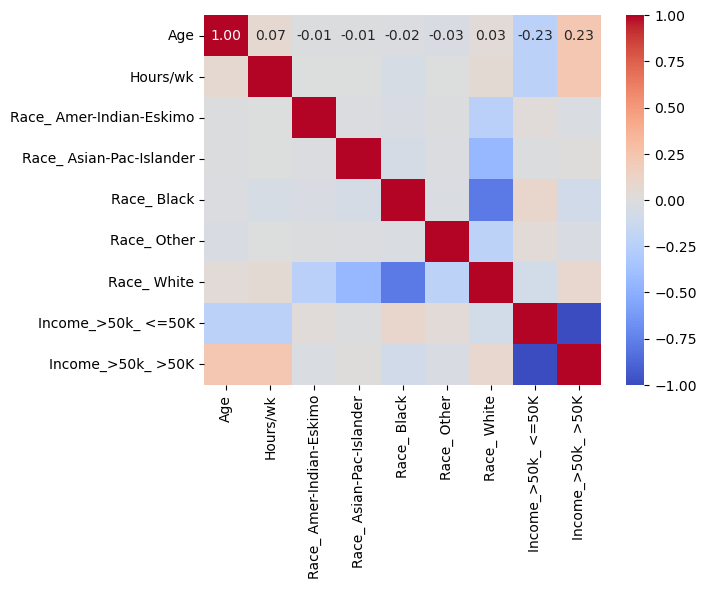

In [436]:
df_temp = pd.get_dummies(df[['Age', 'Race', 'Hours/wk', 'Income_>50k']])

corr_matrix = df_temp.corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.show()

In [437]:
df.replace(' ?', None, inplace=True)
df.isnull().sum()

Age                0
Sector          1836
idk                0
Education          0
idk2               0
Marital_Stat       0
Job             1843
Family             0
Race               0
Gender             0
idk3               0
idk4               0
Hours/wk           0
Country          583
Income_>50k        0
dtype: int64

In [438]:
'''
Dropping columns I do not understand. Keeping the first one even though I don't know what is means
because it has a decent normal distribution.
'''
df.dropna(inplace=True)
try:
    df = df.drop(columns=['idk2', 'idk3', 'idk3', 'idk4'])
except KeyError:
    pass

encoder = LabelEncoder()
df['Income_>50k'] = encoder.fit_transform(df['Income_>50k'])

df['Sector'] = df['Sector'].astype('category').cat.codes
df['Education'] = df['Education'].astype('category').cat.codes
df['Marital_Stat'] = df['Marital_Stat'].astype('category').cat.codes
df['Job'] = df['Job'].astype('category').cat.codes
df['Family'] = df['Family'].astype('category').cat.codes
df['Race'] = df['Race'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes

scaler = StandardScaler()
attrs = df.columns[df.columns != 'Income_>50k']
df[attrs] = scaler.fit_transform(df[attrs])

df.head()

,Age,Sector,idk,Education,Marital_Stat,Job,Family,Race,Gender,Hours/wk,Country,Income_>50k
0,0.042796,2.936000,-1.062722,-0.349865,0.947847,-1.479055,-0.261249,0.385048,0.692806,-0.077734,0.264924,0
1,0.880288,1.887682,-1.007871,-0.349865,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-2.331531,0.264924,0
2,-0.033340,-0.208955,0.244693,0.174763,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.077734,0.264924,0
3,1.108695,-0.208955,0.425240,-2.448375,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.077734,0.264924,0
4,-0.794697,-0.208955,1.406658,-0.349865,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.077734,-5.304034,0


# Random Forest

In [439]:
X = df.drop('Income_>50k', axis=1)
y = df['Income_>50k']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [440]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

Accuracy: 0.8216
Precision: 0.6806
Recall: 0.5487
F1 Score: 0.6076


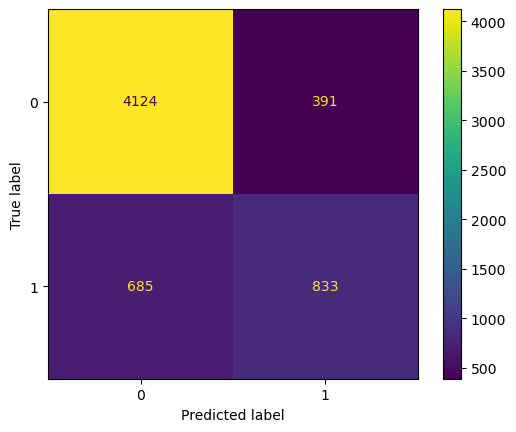

In [ ]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

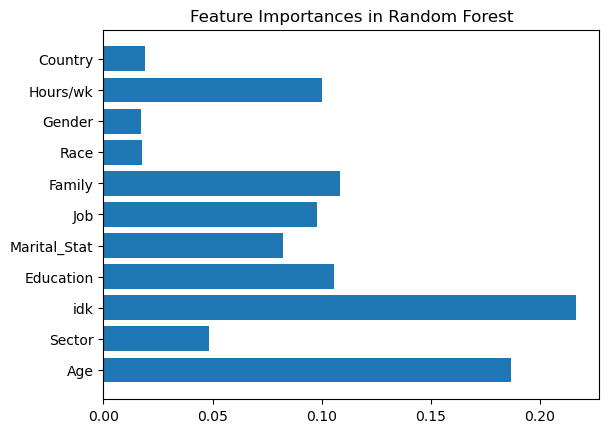

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importances in Random Forest')
plt.show()

# Neurual Network
(Pretty inaccurate. I haven’t set the nodes, level, or learning rate)

In [ ]:
import torch
import torch.nn as nn

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_train = X_train.clone().detach()
y_train = y_train.clone().detach()

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
X_test = X_train.clone().detach()
y_test = y_train.clone().detach()

X_train.shape

torch.Size([24129, 11])

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11, 118),
            nn.ReLU(),
            nn.Linear(118, 1),
            # nn.ReLU(),
            # nn.Linear(64, 1)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        logits = torch.sigmoid(logits)
        return logits

model = Model()
print(model)

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11, out_features=118, bias=True)
    (1): ReLU()
    (2): Linear(in_features=118, out_features=1, bias=True)
  )
)


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.5377
Epoch [20/200], Loss: 0.5092
Epoch [30/200], Loss: 0.4924
Epoch [40/200], Loss: 0.4804
Epoch [50/200], Loss: 0.4715
Epoch [60/200], Loss: 0.4644
Epoch [70/200], Loss: 0.4584
Epoch [80/200], Loss: 0.4529
Epoch [90/200], Loss: 0.4477
Epoch [100/200], Loss: 0.4428
Epoch [110/200], Loss: 0.4381
Epoch [120/200], Loss: 0.4336
Epoch [130/200], Loss: 0.4293
Epoch [140/200], Loss: 0.4253
Epoch [150/200], Loss: 0.4216
Epoch [160/200], Loss: 0.4183
Epoch [170/200], Loss: 0.4153
Epoch [180/200], Loss: 0.4127
Epoch [190/200], Loss: 0.4104
Epoch [200/200], Loss: 0.4085


Accuracy: 0.7944
Precision: 0.6162
Recall: 0.4549
F1 Score: 0.5234


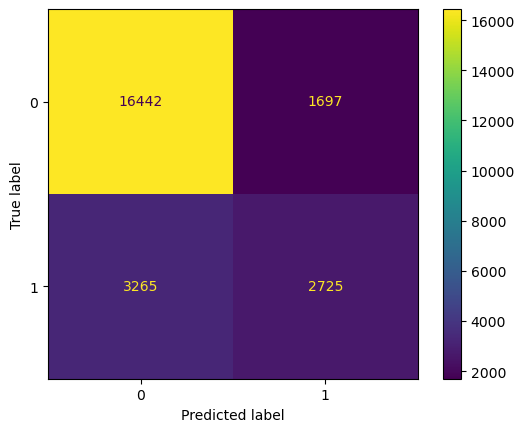

In [ ]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    outputs = model(X_test)
    predicted = outputs.round()
    
    y_true = y_test.cpu().numpy()
    y_pred = predicted.cpu().numpy()

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()